# Text Classification 
- This is a comprehensive tutorial covering intermediate (and advanced) topics in text classification

In [1]:
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#pip install scikit-plot 
import scikitplot as skplt

# Step 1: Loading the dataset

The data is in a single csv file. We can use Pandas, a python package, to load the data

In [2]:
sms_data = []
sms_labels = []
sms = []

openfile = open('data/spam.csv', 'r')
r = csv.reader(openfile)
for i in r:
    sms.append(i)
    sms_data.append(i[0])
    sms_labels.append(i[1])    
openfile.close()

This corpus (in a csv file) contains spam emails and regular emails. Two **labels** or **y values** are 0 (regular email) and 1 (spam email). 

We'll **train a predictive (or machine learning) model to learn to discriminate between spam emails and regular emails automatically**. Then, **the predictive model will be used to classify a set of unknown (or unlabeled) emails as either spam or regular**. 

In [8]:
#entire data
print(len(sms))
#texts only
print(len(sms_data))
#labels only
print(len(sms_labels))

5574
5574
5574


In [9]:
#first row
sms[0]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 '0']

In [10]:
# how many spams in the dataset
print(sms_labels.count('0'))
print(sms_labels.count('1'))  #1 refers to spam emails

4827
747


747 spam emails & 4827 regular emails in the dataset

# Step 2: Preprocessing & Step 3: Feature Engineering (Words to Vectors)

In [11]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(sms_data)
print(tfidf.shape)
print(tfidf)

(5574, 8752)
  (0, 3585)	0.14787938686701288
  (0, 8116)	0.23001892323914586
  (0, 4395)	0.326467645747019
  (0, 5981)	0.25535113536077003
  (0, 2347)	0.2528296765647095
  (0, 1316)	0.2441904570208067
  (0, 5594)	0.15603453765460987
  (0, 4131)	0.10700055412297083
  (0, 1770)	0.2758032215037706
  (0, 3669)	0.1803467768751424
  (0, 8584)	0.22083422107921832
  (0, 4522)	0.2758032215037706
  (0, 1768)	0.31164925159555484
  (0, 2068)	0.2758032215037706
  (0, 7724)	0.15552099304359127
  (0, 3629)	0.15305623970002818
  (0, 1082)	0.326467645747019
  (0, 8358)	0.182416008162686
  (1, 5561)	0.27190435673704183
  (1, 4558)	0.4083285209202484
  (1, 4363)	0.5236769406481622
  (1, 8486)	0.4316309977097208
  (1, 5590)	0.5466195966483365
  (2, 4131)	0.0790778808416933
  (2, 3387)	0.11311495706056472
  :	:
  (5572, 4263)	0.12237960544282811
  (5572, 8405)	0.18728867170245597
  (5572, 1097)	0.1122413213871188
  (5572, 4663)	0.15953549121482666
  (5572, 7116)	0.18431882284957893
  (5572, 3336)	0.1215152

In [12]:
tfidf_vectorizer.get_feature_names()[0:10]

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02']

In [13]:
tfidf_vectorizer.get_feature_names()[-10:]

['zoe',
 'zogtorius',
 'zoom',
 'zouk',
 'zyada',
 'ãº1',
 'ã¼',
 'ãœ',
 'éˆ',
 'œharry']

## Document Term Matrix (DTM)

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform(sms_data).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=sms_data,columns=tfidf_vectorizer.get_feature_names()).head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zoe,zogtorius,zoom,zouk,zyada,ãº1,ã¼,ãœ,éˆ,œharry
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ok lar... Joking wif u oni...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U dun say so early hor... U c already then say...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Nah I don't think he goes to usf, he lives around here though",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 4 Model Building / Model Validation / Model Evaluation

## Naive Bayes

Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

In [16]:
# the below model does not use "split validation", meaning this model is NOT validated. 
# We create this invalidated model to illustrate the concep called "overfitting"
# overfitting happends that the model fits extremely well into the existing dataset, but would not be suitable for new datasets
# Simply, the model is not much generalizable.

nb = MultinomialNB().fit(tfidf, sms_labels)

predicted = nb.predict(tfidf)
np.mean(predicted == sms_labels)  

0.9761392177969143

In [17]:
print('\n overall accuracy:')
print(metrics.accuracy_score(sms_labels, predicted))

print('\n confusion_matrix:')
print(metrics.confusion_matrix(sms_labels, predicted))

print('\n Here is the classification report:')
print(metrics.classification_report(sms_labels, predicted))


 overall accuracy:
0.9761392177969143

 confusion_matrix:
[[4827    0]
 [ 133  614]]

 Here is the classification report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4827
          1       1.00      0.82      0.90       747

avg / total       0.98      0.98      0.98      5574



- 4827 regular mails correctly predicted as regular & zero false positive 
- 614 spam correctly as spam & 133 false negative ==> This indicates that you would expect some spam mails in your inbox.
- About different measures (e.g., prediction) for model accuracy, https://en.wikipedia.org/wiki/Precision_and_recall

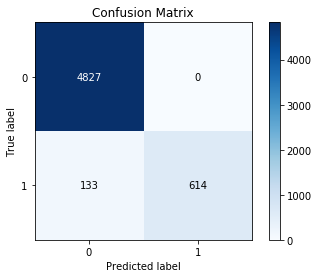

In [18]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# pip install scikit-plot

skplt.metrics.plot_confusion_matrix(y_true=sms_labels, y_pred=predicted)
plt.show()

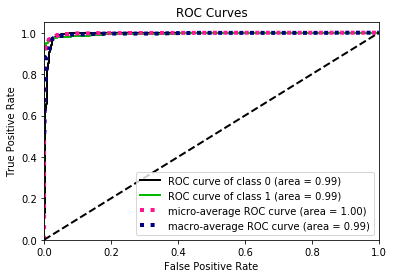

In [19]:
# true positive rate = 614 / 747 = 82%
# false positive rate = 0 / 4827 = 0%

probas = nb.predict_proba(tfidf)
skplt.metrics.plot_roc(y_true=sms_labels, y_probas=probas)
plt.show()

The above ROC curve shows our Naive Bayesian classification model is almost perfect. 
<br><br>
The diagonal line represents pure guessing.

## Split validation

In Step 4, we built a model using different machine learning (or classification) algorithms. However, it is a **bad idea to evaluate the performance of the model on the same dataset we train the model on**. Thus, we'll use a validation method called ** split validation**.

First, we split the dataset to two parts: **training dataset (70% of the original dataset)** and **testing dataset (30% of the original dataset)**. We build a model using training dataset and apply the model to testing dataset and measure the accuracy of the model. You could have a 80-20 split or a 50-50 split.

We will build a predictive model using **x_train** and **y_train**, which are called as **training dataset**.

Then, we will apply the model to **x_test** and **y_test** (**testing dataset**) and this will tell us the performance or quality of the model

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.developer.com/imagesvr_ce/6793/ML4.png")

In [21]:
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.3, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(3901, 3901, 1673, 1673)

In [22]:
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)
print(X_train[:2])
print("+++++++++++++++++++++++++++++++++++++++++")
print(X_test[:2])

  (0, 3182)	0.34129878492030447
  (0, 1922)	0.6004378402878641
  (0, 2372)	0.6004378402878641
  (0, 3274)	0.27594680975462554
  (0, 938)	0.2484712367228165
  (0, 7210)	0.15677800234884126
  (1, 5933)	0.258711966055589
  (1, 4698)	0.6819219252799984
  (1, 2211)	0.2598237567601937
  (1, 3704)	0.377125617507527
  (1, 7010)	0.27752586155984127
  (1, 5468)	0.425790895452364
+++++++++++++++++++++++++++++++++++++++++
  (0, 7210)	0.1269402950696128
  (0, 6997)	0.22510474503229708
  (0, 6373)	0.1928973004434898
  (0, 5229)	0.2784828459218237
  (0, 4447)	0.27564784479135046
  (0, 3888)	0.23566743494259
  (0, 3808)	0.4238852289542574
  (0, 3701)	0.23332599618327315
  (0, 3172)	0.269744320099569
  (0, 3127)	0.25647516259355124
  (0, 1836)	0.3326490775932562
  (0, 1144)	0.20830269953022892
  (0, 960)	0.3289905044742613
  (0, 812)	0.2280124699804868
  (1, 5933)	0.425140823894348
  (1, 4129)	0.5526837553138312
  (1, 3888)	0.3797534296218529
  (1, 3764)	0.45232868675332566
  (1, 3390)	0.26563213079498

In [23]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.9557680812910938

In [24]:
print('\n overall accuracy:')
print(metrics.accuracy_score(y_test, predicted))

print('\n confusion_matrix:')
print(metrics.confusion_matrix(y_test, predicted))

print('\n Here is the classification report:')
print(metrics.classification_report(y_test, predicted))


 overall accuracy:
0.9557680812910938

 confusion_matrix:
[[1431    0]
 [  74  168]]

 Here is the classification report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1431
          1       1.00      0.69      0.82       242

avg / total       0.96      0.96      0.95      1673



- true positive rate is only 69%
- false negative rate is very high, meaning a large number of spams will be found in your inbox.

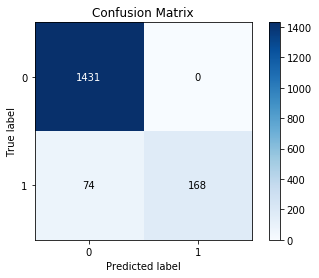

In [25]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# pip install scikit-plot

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

### Summary of split validation:
* The accuracy of Naive Bayes-based model on this dataset was about 97%. This performance is based on when the predictive model was tested on the same dataset on which the model was built. **again, this is a bad practice since the model appears to be better than what it is**. This is called **"model overfitting**.

* The **true accuracy** of Naive Bayes-based model on this dataset turns out to be about 95%, according to **split validation**. 

# Step 5: Model Deployment

In [26]:
docs_new = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question",
            "Even my brother is not like to speak with me. They treat me like aids patent.",
             "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9",
            "hello, thank you",
           "To claim txt DIS to 87121"]

unlabeled_tfidf = tfidf_vectorizer.transform(docs_new)

predicted = nb.predict(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question' => 1
'Even my brother is not like to speak with me. They treat me like aids patent.' => 0
"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9" => 0
'hello, thank you' => 0
'To claim txt DIS to 87121' => 1


In [27]:
#let's find the probability

predicted_prob = nb.predict_proba(unlabeled_tfidf)

for doc, category in zip(docs_new, predicted_prob):
    print('%r => %s' % (doc, category))

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question' => [0.09803565 0.90196435]
'Even my brother is not like to speak with me. They treat me like aids patent.' => [0.99482808 0.00517192]
"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9" => [0.90327474 0.09672526]
'hello, thank you' => [0.98165747 0.01834253]
'To claim txt DIS to 87121' => [0.38969356 0.61030644]


# Appendixes
- We need to understand the following topics as well.

## Appendix. Building a pipeline

As you have seen, building a classification (or predictive) model requires several steps. **Pipeline** is what chains these different steps together, and thus streamline the predictive modeling process. Using pipeline we write less codes.

Also, Pipeline can build several predictive models through a loop to find the best one.

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
http://scikit-learn.org/stable/modules/pipeline.html

In [28]:
# combining feature engineering and model building
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])

In [29]:
nb_pipeline = nb_pipeline.fit(x_train, y_train)
nb_pipeline

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.9557680812910938

In [31]:
# a complete pipeline

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.9557680812910938

## Appendix. Other Classifiers: How to find a better model with different classifiers or classification algorithms?

<img src="http://scikit-learn.org/stable/_static/ml_map.png">

### kNeighbors Classifier (kNN)
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- http://scikit-learn.org/stable/modules/neighbors.html

In [27]:
from sklearn.neighbors import KNeighborsClassifier #import algorithm

#Include completed pipeline
knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)  


0.8971906754333533

### Support Vector Machine (SVM)
- http://scikit-learn.org/stable/modules/svm.html

In [28]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9838613269575612

This shows that SVM works best for this dataset. You can use this svm model for model deployment

In [32]:
# to figure out processing time

import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
print(np.mean(predicted == y_test))

elapsed = timeit.default_timer() - start_time
print("%s %s" % ("this processing has taken", elapsed))

0.9838613269575612
this processing has taken 6.63398332299224


In my computer the above processing took about 2.63 seconds. How about yours?

In [30]:
docs_new = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question",
            "Even my brother is not like to speak with me. They treat me like aids patent.",
             "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9",
            "hello, thank you",
           "To claim txt DIS to 87121"]

#unlabeled_tfidf = tfidf_vectorizer.transform(docs_new)
predicted = svm_pipeline.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question' => 1
'Even my brother is not like to speak with me. They treat me like aids patent.' => 0
"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9" => 0
'hello, thank you' => 0
'To claim txt DIS to 87121' => 1


In [31]:
#let's find the probability

predicted_prob = svm_pipeline.predict_proba(docs_new)

for doc, category in zip(docs_new, predicted_prob):
    print('%s => %s' % (doc, (category)))

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question => [0.01651113 0.98348887]
Even my brother is not like to speak with me. They treat me like aids patent. => [0.99897918 0.00102082]
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 => [0.98031493 0.01968507]
hello, thank you => [0.98425937 0.01574063]
To claim txt DIS to 87121 => [2.36162413e-06 9.99997638e-01]


## Appendix. Changing Parameters: How to improve this model? How to find a better model? How to deploy the predictive model in practice?

### Improving the Naive Bayes-based predictive model by changing parameter values?

See the parameters in Naive Bayes classifier

- TfidfVectorizer(input=’content’, encoding=’utf-8’, decode_error=’strict’, strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer=’word’, stop_words=None, token_pattern=’(?u)\b\w\w+\b’, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.int64’>, norm=’l2’, use_idf=True, smooth_idf=True, sublinear_tf=False)

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- max_df : float in range [0.0, 1.0] or int, default=1.0 
When building the vocabulary ignore terms that have a **document frequency** strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. 
    - For example, max_df = 0.7 ==> This removes words which appear in more than 70% of the corpus (**removing frequent words**).
<br><br>    
- min_df : float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. 
    - For example, min_df = 5 ==> This removes words which appear in less than five documents (**removing rare words**).

### Using different parameter values (e.g., removing stopwords, using stemming words, using ngrams, removing too frequent words, removing too rare words), the model accuracy can be improved.

In [73]:
# removing stopwords

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.9665271966527197

In [74]:
# removing stopwords & rare words
# min_df=2 argument removes words that appear in 2 or less documents/items

nb_pipeline = Pipeline([('tfidf',
                         TfidfVectorizer(decode_error ='ignore', stop_words='english', min_df=2)),
                        ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.9742976688583384

In [79]:
# removing stopwords

knn_pipeline = Pipeline([('tfidf',
                          TfidfVectorizer(decode_error ='ignore', stop_words='english')),
                         ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.8918111177525403

In [80]:
# removing stopwords

svm_pipeline = Pipeline([('tfidf',
                          TfidfVectorizer(decode_error ='ignore', stop_words='english')),
                         ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.982068141063957

In [77]:
# removing stopwords & using bigram as well
# ngram_range=(1,2) compares bigrams 

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.8828451882845189

In [81]:
#SVM is most accurate when you account for: stopwords, ngram(bigrams), and linear regression

svm_pipeline = Pipeline([('tfidf',
                          TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))),
                         ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9838613269575612

It looks like the best model uses **TFIDF (and bigram) with SVM after removing stopwords**

### Pipeline with multiple classifiers (or algorithms)
- Then, can we test the accuracy of all classifiers at once?

In [82]:
classifiers = [MultinomialNB(), KNeighborsClassifier(), SVC(kernel='linear', probability=True)]

In [84]:
for clf in classifiers:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), 
                         ('clf', clf)])
    classifiers_pipeline = pipeline.fit(x_train, y_train)
    predicted = classifiers_pipeline.predict(x_test)
    print("%s --> %s" % (clf, np.mean(predicted == y_test)))
    print(" ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ")

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) --> 0.9539748953974896
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') --> 0.8828451882845189
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) --> 0.9838613269575612
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 


## Appendix. k-fold Cross validation (CV) 

### 10-fold CV
* The basic idea is that, rather than testing the model quality **only once**, cross validation (or 10-fold CV) tests the model **10 times** with 10 different testing datasets.

#### How?
* The training (or original) dataset is randomly partitioned into 10 equal sized subsamples (see the figure below). 
* At each time, one subsample is set aside as the **testing** or **validation dataset** and the other 9 subsamples are used as the training dataset. 
* A model is built using the training dataset and tested with the testing dataset. This is done 10 times. 
* This leads to 10 evaluation scores (mean squared error). The final score is based on the average of the scores.

<img src="https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png">


In [87]:
# use nb

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(nb_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.98028674 0.97670251 0.96774194 0.97849462 0.96774194 0.96415771
 0.96774194 0.97302158 0.97302158 0.97661871]
0.9725529254016141


In [88]:
# use knn

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(knn_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())



[0.90681004 0.91577061 0.91397849 0.90501792 0.90860215 0.90860215
 0.90860215 0.91546763 0.91546763 0.92086331]
0.9119182073695882


In [90]:
import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(svm_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

elapsed = timeit.default_timer() - start_time
print("%s %s" % ("this processing has taken", elapsed))

[0.99103943 0.98028674 0.9874552  0.99103943 0.98207885 0.98387097
 0.98566308 0.98201439 0.98741007 0.98741007]
0.9858268224130372
this processing has taken 77.93409132617728


This process has taken 72 seconds in my machine. 

## Appendix. Parameter tuning using Grid Search (Requiring high computational power!!!) 
## Warning: This process is likely to slow down your computer

" We’ve already encountered some parameters such as stopwords and ngram in the TfidfTransformer. Classifiers tend to have many parameters as well; e.g., MultinomialNB includes a smoothing parameter alpha and SGDClassifier has a penalty parameter alpha and configurable loss and penalty terms in the objective function (see the module documentation, or use the Python help function, to get a description of these).

Instead of tweaking the parameters of the various components of the chain, it is possible to run an exhaustive search of the best parameters on a grid of possible values. We try out all classifiers on either words or bigrams, with or without idf, and with a penalty parameter of either 0.01 or 0.001 for the linear SVM:"

http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [91]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])

In [92]:
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__min_df': [1, 2, 5],
              'tfidf__max_df': [0.9, 0.8, 0.7],
              'clf__alpha': (0.01, 0.001, 1),
}

**TfidfVectorizer** 

- ngram_range : tuple (min_n, max_n)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

- min_df : float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

**MultinomialNB()** MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

- alpha : float, optional (default=1.0)
    - Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [93]:
gs_clf = GridSearchCV(nb_pipeline, parameters)
gs_clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'tfidf__min_df': [1, 2, 5], 'tfidf__max_df': [0.9, 0.8, 0.7], 'clf__alpha': (0.01, 0.001, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
gs_clf.best_score_

0.9864137400666496

In [95]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.01
tfidf__max_df: 0.9
tfidf__min_df: 1
tfidf__ngram_range: (1, 2)


Now, we can use the best model recommended by gridsearch.

In [96]:
# split validation

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test) 

0.9814704124327556

In [98]:
# 10 fold cross validation

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(nb_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.99462366 0.98207885 0.98924731 0.98924731 0.97849462 0.98387097
 0.98566308 0.98741007 0.98021583 0.98920863]
0.9860060338825715


## Appendix get most informative features for scikit-learn classifier (Naive Bayes) for different class?

In [99]:
# since we know the parameters for the best NB model, let's initialize TfidfVectorizer again

tfidf_vectorizer = TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, ngram_range=(1,2), max_df=0.9)

In [100]:
# split validation again

x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(4459, 4459, 1115, 1115)

In [101]:
# transform traing data and testing data to tfidf format 

X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

In [103]:
# now we have more vectors due to bi-grams
print(X_train.shape)
print(X_test.shape)

(4459, 31554)
(1115, 31554)


In [ ]:
print tfidf_vectorizer.get_feature_names()[0:5]
print tfidf_vectorizer.get_feature_names()[-5:]

In [104]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.9533632286995516

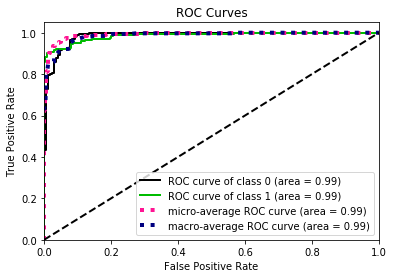

In [106]:
probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_true=y_test, y_probas=probas)
plt.show()

In [109]:
#https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c

def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print("=========================================")

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)

0 -10.452933789790448 000pes
0 -10.452933789790448 000pes 48
0 -10.452933789790448 0125698789
0 -10.452933789790448 0125698789 ring
0 -10.452933789790448 0quit
0 -10.452933789790448 0quit edrunk
0 -10.452933789790448 10 1mega
0 -10.452933789790448 10 den
0 -10.452933789790448 10 did
0 -10.452933789790448 10 evey
1 -7.550702919931535 free
1 -7.81223633053982 txt
1 -7.890726461354635 mobile
1 -8.014208044609424 stop
1 -8.020512176333012 claim
1 -8.02266882123961 text
1 -8.038482950181008 ur
1 -8.092133690586532 prize
1 -8.143649163112967 reply
1 -8.185761160649694 www


It appears **spam** mails tend to contain such terms as **free, claim, prize, reply, ... **

# References

- http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
- http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html (Naive Bayes)
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (KNN)
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html (SVM)
- https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c

# Neural Network using SVM

In [32]:
#SVM Neural Network Method

from sklearn.neural_network import MLPClassifier

In [33]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [34]:
NN_pipeline = Pipeline([('tfidf',
                          TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))),
                         ('clf', clf)])
NN_pipeline = NN_pipeline.fit(x_train, y_train)
predicted = NN_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9796772265391512

# Understanding Theory of Models

TLDR, what I think are the most important factors of KNN vs NB:<br>
KNN is bad if you have too many data points and speed is important.<br>
NB is bad if (you know that) not having conditional independence in your data will have a highly negative influence on classification, or if (you know that) the decision boundary is not linear / not elliptic / not parabolic.

### I can only think of three more advantages to KNN over NB:
- KNN's decision boundary can take on any form

This is because KNN is non-parametric, i.e. it makes no assumption about the data distribution. Contrast this to NB, which assumes that attributes are conditionally independent to each other given the class, and are normally distributed (for real-valued attributes). As a result, NB can only have linear, elliptic, or parabolic decision boundaries, which makes the flexibility of KNN's decision boundary a huge advantage. But of course, if your data is separable by any of the form of NB's - -decision boundaries, then KNN is not going to help much.

- Naive Bayes can be fooled by correlated attributes

Imagine we have two attributes, A and B, and assume a two-class classification problem. Suppose that P(A|C1) = P(A|C2) and P(B|C1) = P(B|C2); that is marginal distributions of A and B in both classes are the same. In this case, NB can't classify data points as it relies on marginal distribution of attributes given class to do classification. If the distinguishing characteristic for classification is not the marginal distributions but correlation, then NB won't be a good choice. An example is when in class 1 A is positively correlated with B whereas in class 2 they are negatively correlated.<br><br>
- Naive Bayes can be fooled by zero frequencies

You have a zero frequency problem when you don't observe a count-valued attribute for a particular class. This is a common problem in text classification, e.g. you see many occurrences of the word "password" in spam class, but you don't observe "password" in non-spam class. As a result, any new data point which contains a zero-frequency attribute will be always classified as the other class, e.g. any email which contains "password" will always be classified as spam, the reason being P(password|non-spam) = 0. Simple solutions exist for this problem, though, for example, Laplace or add-one smoothing.</span>


### In addition, here are cons of KNN, so you'd know when not to choose KNN over NB:
- KNN doesn't know which attributes are more important

When computing distance between data points (usually Euclidean distance or other generalisations of it), each attribute normally weighs the same to the total distance. This means that attributes which are not so important will have the same influence on the distance compared to more important attributes.

- Non-parametric, and thus not as interpretable as NB

NB may not be the most interpretable model for classification, but arguably it is more interpretable than KNN. With KNN you can't really answer question like "Why is this data point classified as class A?" or "What is the relationship between this attribute and the class distribution?"

- Doesn't handle missing data gracefully

NB is one of the classifiers that handle missing data very well: it just excludes the attribute with missing data when computing posterior probability (i.e. probability of class given data point). With KNN, you can't do classification if you have missing data. The reason is that distance is undefined if one or more of attributes (which are essentially dimensions) are missing, unless you are willing to omit these attributes when computing distance. You thus have to rely on common solutions for missing data, e.g. imputing average values.

- Have to tune K

KNN have one parameter more than NB: the number of neighbours K (NB has no obvious parameter). This means you need to do model selection for KNN in order to determine the best K, either with training-validation split or cross-validation.
Slow during prediction (not training)
<br><br>
<b>You should definitely not use KNN when you have a very large number of data points; although you can get around this problem a little by using KD trees, inverted lists, or hashing. What an irony since KNN is asymptotically correct (always correct if you have infinitely many data points with no noise).